In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob, os

In [ ]:
# make a folder for real template and altered easy
# https://www.kaggle.com/datasets/ruizgara/socofing?resource=download

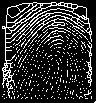

In [3]:
img = cv2.imread("100__M_Left_index_finger.bmp", 0)
bg = cv2.dilate(img, np.ones((5,5), dtype=np.uint8))
bg = cv2.GaussianBlur(bg, (5,5), 1)
src_no_bg = 255 - cv2.absdiff(img, bg)
ret, thresh = cv2.threshold(src_no_bg, 240, 255, cv2.THRESH_BINARY)

thinned = cv2.ximgproc.thinning(thresh)
cv2_imshow(thinned)

cv2.imwrite("./trial-out.png", thinned)

cv2.waitKey(0)
cv2.destroyAllWindows()

Matched!


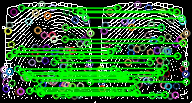

In [4]:
MIN_MATCH_COUNT = 15

input_img = cv2.imread('trial2-out.png')
input_img=input_img.astype('uint8')
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(input_img, None)
img1 = cv2.drawKeypoints(input_img, kp, input_img)

flag = 0

# os.chdir("./")
# for file in glob.glob("*.png"):

frame=cv2.imread('trial-out.png')
frame=frame.astype('uint8')
gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(frame, None)
img2=cv2.drawKeypoints(frame, kp, frame)
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches=flann.knnMatch(np.asarray(des1, np.float32), np.asarray(des2, np.float32), k=2)

good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>10:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    print("Matched!")
    flag=1
else:
    matchesMask = None

draw_params = dict(matchColor = (0, 255, 0),
                singlePointColor = None,
                matchesMask = matchesMask,
                flags = 2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)
cv2_imshow(img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

if flag==0:
    print("No Matches among the given set!!")